In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

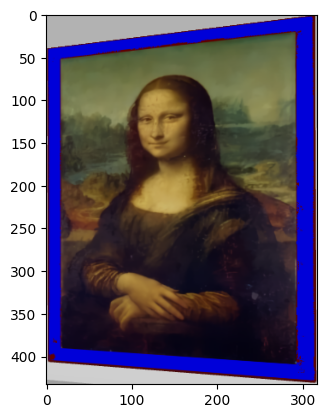

In [3]:
# Load the image
image = cv2.imread("..\data\monalisa\mona_1.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [4]:
image.shape

(433, 317, 3)

In [5]:
# lets explore the images...

In [6]:
images = []

for i in range(1, 893 + 1):
    path = f"..\data\monalisa\mona_{i}.png"
    img = cv2.imread(path)
    if img is None:
        # image failed to load
        continue
    else:
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img_rgb)

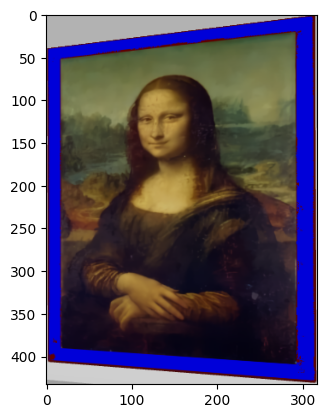

In [7]:
images[0]
plt.imshow(images[0])
plt.show()

Height  | max: 597 ; min: 130
Width   | max: 401 ; min: 73
Average | height: 389.93364928909955 ; width: 207.00829383886256

(597, 390, 3)


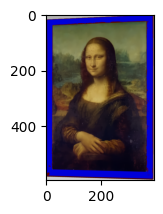

(130, 92, 3)


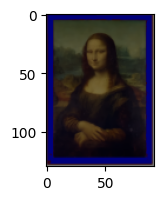

(577, 401, 3)


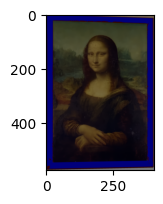

(265, 73, 3)


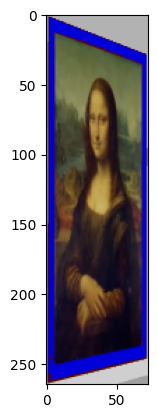

In [8]:
def image_info(images, debug=False):
    m_height, m_width = [0, 100_000], [0, 100_000]
    avg_h_w = [0, 0]
    indexes = [0, 0, 0, 0]
    for i in range(len(images)):
        img = images[i]
        if (img) is None:
            print(i)
        h, w = img.shape[0], img.shape[1]
        if h > m_height[0]: 
            m_height[0] = h
            indexes[0] = i
        elif h < m_height[1] : 
            m_height[1] = h
            indexes[1] = i
        if w > m_width[0]: 
            m_width[0] = w
            indexes[2] = i
        elif w < m_width[1] : 
            m_width[1] = w
            indexes[3] = i
        avg_h_w[0] += h
        avg_h_w[1] += w
    avg_h_w[0] /= len(images)
    avg_h_w[1] /= len(images)

    print("Height  | max: {} ; min: {}\nWidth   | max: {} ; min: {}\nAverage | height: {} ; width: {}\n".format(m_height[0], m_height[1], m_width[0], m_width[1], avg_h_w[0], avg_h_w[1]))

    if debug:
        return (m_height[0], m_width[0], indexes)

    # return desired size
    return (m_height[0], m_width[0])
ret_val = image_info(images, True)
plt.subplot(1, 4, 1)
plt.imshow(images[ret_val[2][0]])
print(images[ret_val[2][0]].shape)
plt.show()
plt.subplot(1, 4, 2)
plt.imshow(images[ret_val[2][1]])
print(images[ret_val[2][1]].shape)
plt.show()
plt.subplot(1, 4, 3)
plt.imshow(images[ret_val[2][2]])
print(images[ret_val[2][2]].shape)
plt.show()
plt.subplot(1, 4, 4)
plt.imshow(images[ret_val[2][3]])
print(images[ret_val[2][3]].shape)
plt.show()

In [9]:
def color_prepare(image_input, debug=False, test=False):

    # Convert the image to RGB color space
    # rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    rgb = np.copy(image_input)

    # Define the range for blue color in RGB
    lower_color_thr = np.array([0, 0, 75])
    upper_color_thr = np.array([70, 70, 255])

    if test:
        max_value = np.max(rgb)
        lower_color_thr = np.array([40, 0, 0])
        upper_color_thr = np.array([120, 15, 15])

    if debug:
        plt.figure(figsize=(20,20))

    # Create a mask for the blue color
    mask = cv2.inRange(rgb, lower_color_thr, upper_color_thr)
    # mask = cv2.Canny(image, 300, 500)
    # mask = cv2.adaptiveThreshold(cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 15, 30)
    if debug:
        plt.subplot(1, 3, 1)
        plt.imshow(mask, cmap="gray")

    # Set all pixels corresponding to the blue border to black
    rgb[mask != 0] = [0, 0, 0]

    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    if debug:
        blank = np.zeros_like(rgb)
        cv2.drawContours(blank, contours, -1, (0, 255, 0), 1)
        plt.subplot(1, 3, 2)
        plt.imshow(blank)

    if contours:
        # Sort contours by area, largest first
        contours = sorted(contours, key=cv2.contourArea, reverse=True)

        # Get the second largest contour
        second_largest_contour = contours[1]

        # Create a mask for the second largest contour
        contour_mask = np.zeros_like(mask)
        cv2.drawContours(contour_mask, [second_largest_contour], -1, 255, thickness=cv2.FILLED)
        if debug:
            plt.subplot(1, 3, 2)
            plt.imshow(contour_mask, cmap="gray")

        # Invert the contour mask to get the area outside the contour
        outside_contour_mask = cv2.bitwise_not(contour_mask)
        if debug:
            plt.subplot(1, 3, 2)
            plt.imshow(outside_contour_mask, cmap="gray")

        # Set all masked pixels to white
        rgb[outside_contour_mask != 0] = [0, 0, 0]

        # image_yuv = cv2.cvtColor(rgb, cv2.COLOR_RGB2YUV)
        # # Apply histogram equalization on the Y channel
        # image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])
        # rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

        max_value = np.max(rgb)
        rgb = rgb.astype(np.float32) / max_value

        if debug:
            plt.subplot(1, 3, 3)
            plt.imshow(rgb)
            plt.show()

        return rgb

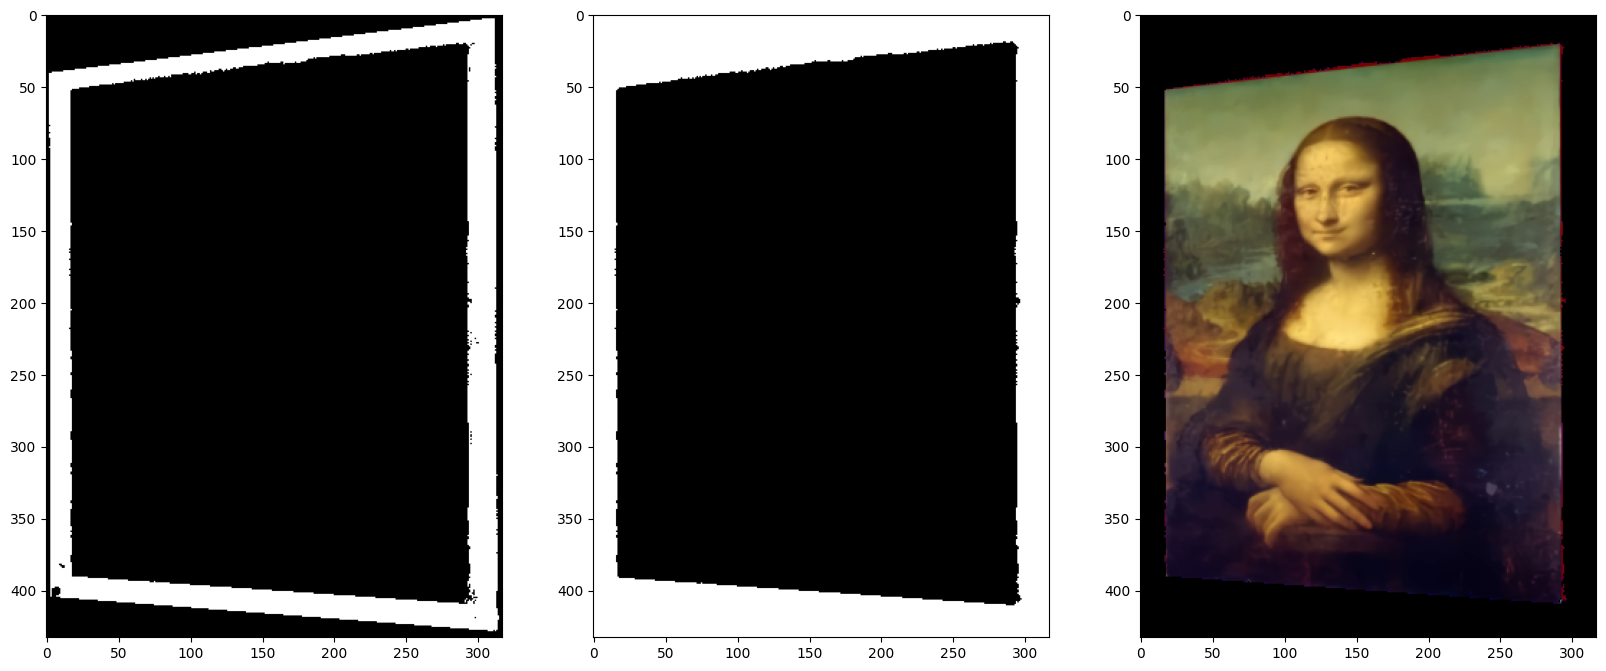

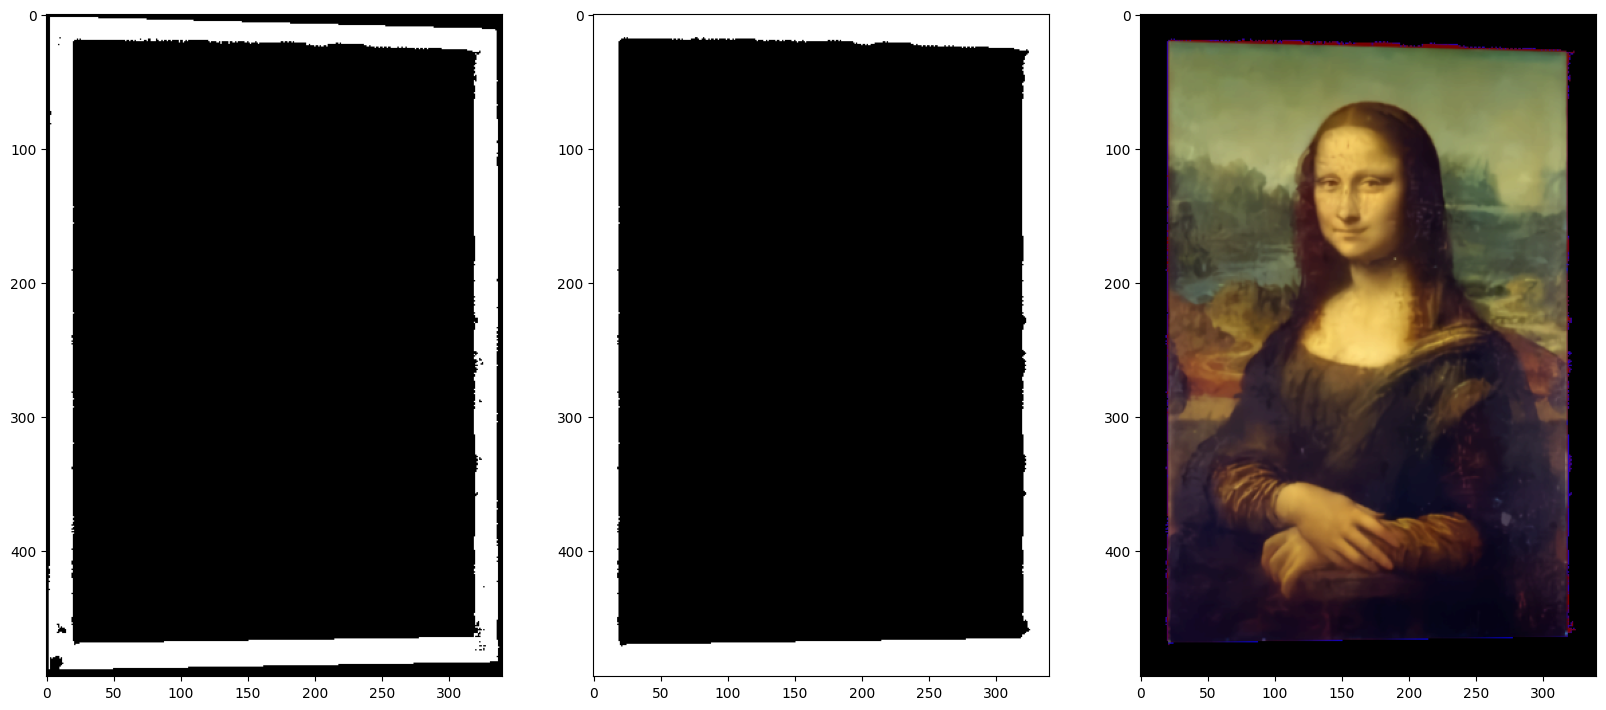

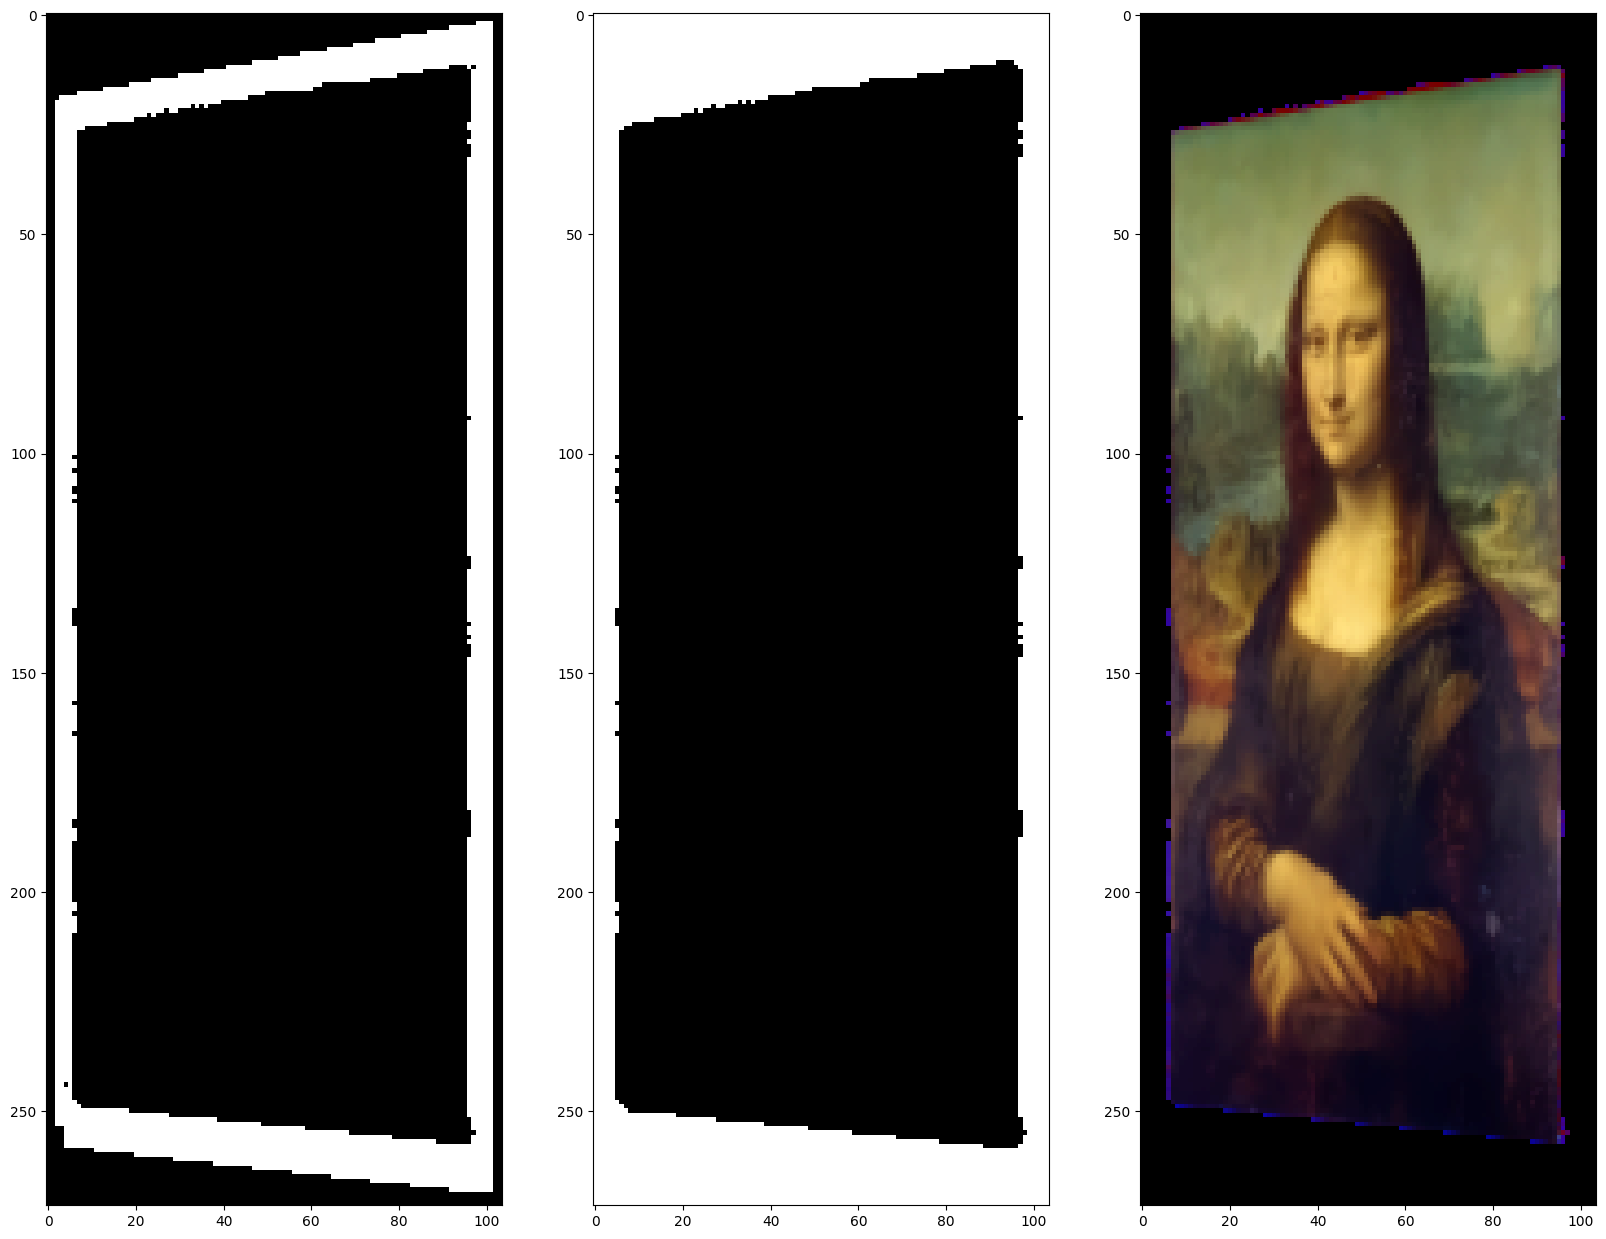

In [10]:
image284 = cv2.imread("..\data\monalisa\mona_284.png")
image284 = cv2.cvtColor(image284, cv2.COLOR_BGR2RGB)
image321 = cv2.imread("..\data\monalisa\mona_321.png")
image321 = cv2.cvtColor(image321, cv2.COLOR_BGR2RGB)
# image = images[0]
output = color_prepare(image, debug=True)
output284 = color_prepare(image284, debug=True)
output321 = color_prepare(image321, debug=True)

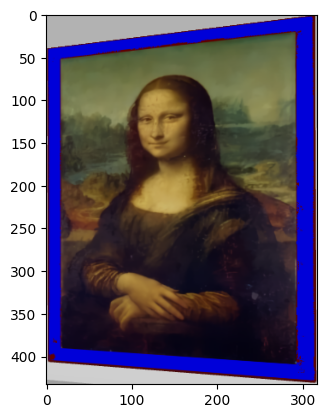

In [11]:
plt.imshow(image)
plt.show()

In [12]:
def expand_image(img):

    # Get current image size
    height, width = img.shape[:2]

    # Calculate the desired width based on the height
    desired_width = height

    # Calculate padding size
    pad_width = max(0, desired_width - width)
    top = 0
    bottom = 0
    left = pad_width // 2
    right = pad_width - left

    # Add black padding to the image
    padded_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))

    return padded_img

(433, 433, 3)
(494, 494, 3)
(272, 272, 3)


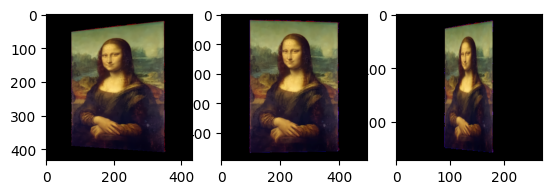

In [13]:
# desired_size = image_info(images)

padded = expand_image(output)
plt.subplot(1, 3, 1)
plt.imshow(padded)
print(padded.shape)
padded284 = expand_image(output284)
plt.subplot(1, 3, 2)
plt.imshow(padded284)
print(padded284.shape)
padded321 = expand_image(output321)
plt.subplot(1, 3, 3)
plt.imshow(padded321)
print(padded321.shape)

In [14]:
def downscale_image(img, new_resolution):

    resized_img = cv2.resize(img, (new_resolution, new_resolution), interpolation=cv2.INTER_AREA)

    return resized_img

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


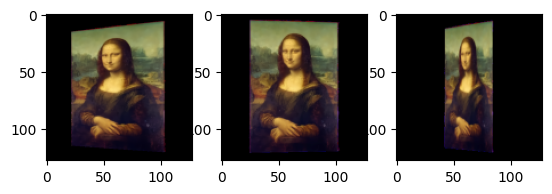

In [15]:
resized = downscale_image(padded, 128)
plt.subplot(1, 3, 1)
plt.imshow(resized)
print(resized.shape)
resized284 = downscale_image(padded284, 128)
plt.subplot(1, 3, 2)
plt.imshow(resized284)
print(resized284.shape)
resized321 = downscale_image(padded321, 128)
plt.subplot(1, 3, 3)
plt.imshow(resized321)
print(resized321.shape)
plt.show()

In [16]:
def size_prepare(img, new_resolution):

    # Get current image size
    height, width = img.shape[:2]

    # Calculate the desired width based on the height
    desired_width = height

    # Calculate padding size
    pad_width = max(0, desired_width - width)
    top = 0
    bottom = 0
    left = pad_width // 2
    right = pad_width - left

    # Add black padding to the image
    padded_img = cv2.copyMakeBorder(img, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))

    resized_img = cv2.resize(padded_img, (new_resolution, new_resolution), interpolation=cv2.INTER_AREA)

    return resized_img

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)


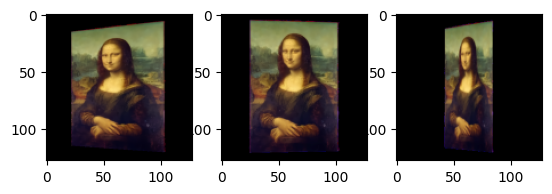

In [17]:
test = size_prepare(output, 128)
plt.subplot(1, 3, 1)
plt.imshow(test)
print(test.shape)
test284 = size_prepare(output284, 128)
plt.subplot(1, 3, 2)
plt.imshow(test284)
print(test284.shape)
test321 = size_prepare(output321, 128)
plt.subplot(1, 3, 3)
plt.imshow(test321)
print(test321.shape)
plt.show()

(107, 107, 3)


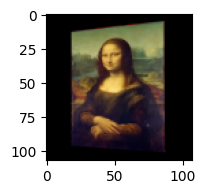

In [18]:
test = size_prepare(output, 107)
plt.subplot(1, 3, 1)
plt.imshow(test)
print(test.shape)

(128, 128, 3)


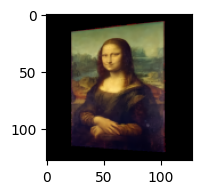

In [19]:
test = size_prepare(output, 128)
plt.subplot(1, 3, 1)
plt.imshow(test)
print(test.shape)

In [17]:
images

[array([[[178, 178, 178],
         [178, 178, 178],
         [178, 178, 178],
         ...,
         [178, 178, 178],
         [178, 178, 178],
         [178, 178, 178]],
 
        [[178, 178, 178],
         [178, 178, 178],
         [178, 178, 178],
         ...,
         [ 80,  23,  24],
         [178, 178, 178],
         [178, 178, 178]],
 
        [[178, 178, 178],
         [178, 178, 178],
         [178, 178, 178],
         ...,
         [ 80,  10,   9],
         [178, 178, 178],
         [178, 178, 178]],
 
        ...,
 
        [[161, 161, 161],
         [160, 160, 160],
         [161, 161, 161],
         ...,
         [ 92,  31,  31],
         [112,  75,  78],
         [164, 142, 142]],
 
        [[159, 159, 159],
         [160, 160, 160],
         [161, 161, 161],
         ...,
         [129,  95,  97],
         [164, 151, 154],
         [187, 174, 173]],
 
        [[160, 160, 160],
         [161, 161, 161],
         [161, 161, 161],
         ...,
         [207, 207, 207],
  

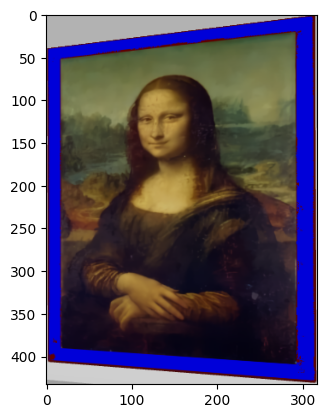

In [18]:
plt.imshow(images[0])
plt.show()

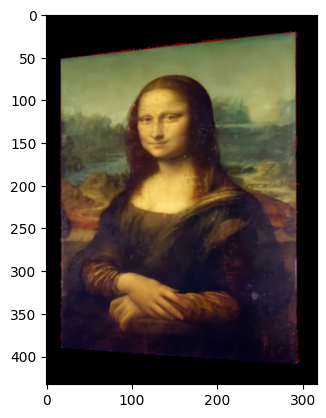

In [19]:
res = color_prepare(images[0])
plt.imshow(res)
plt.show()

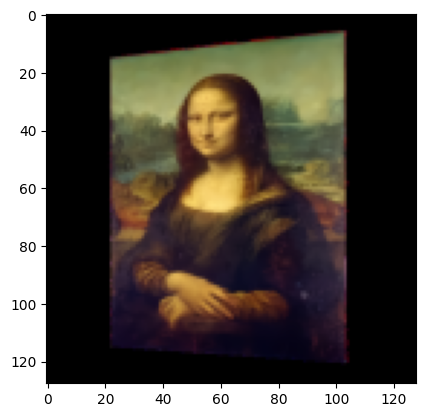

In [20]:
res2 = size_prepare(res, 128)
plt.imshow(res2)
plt.show()

In [21]:
# lets transform the dataset
transformed_images = []
desired_res = 128

# for i in range(len(images)):
for i in range(0):
    img = images[i]
    if img is None:
        print("None img", img)
    # plt.subplot(1, 3, 1)
    # plt.imshow(img)
    c_prep = color_prepare(img)
    # plt.subplot(1, 3, 2)
    # plt.imshow(c_prep)
    if c_prep is None:
        print("None c_prep", c_prep)
        print(i)
    s_prep = size_prepare(c_prep, desired_res)
    # plt.subplot(1, 3, 3)
    # plt.imshow(s_prep)
    # plt.show()
    transformed_images.append(s_prep)

    stat = cv2.imwrite(f"dataset/processed/monap_{i}.png", cv2.cvtColor(s_prep, cv2.COLOR_RGB2BGR)*255)
    if stat is None:
        print("oops")

In [24]:
try:
    plt.imshow(transformed_images[0])
    plt.show()
except:
    pass

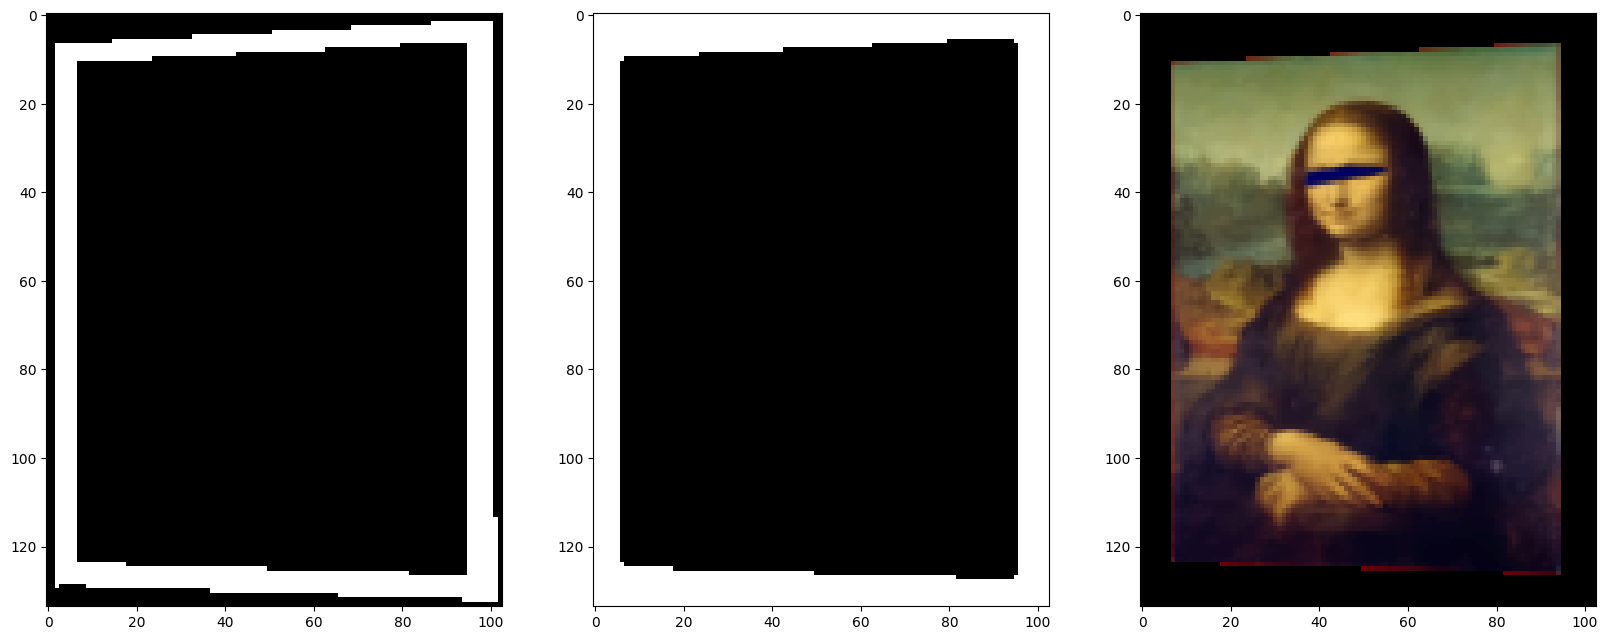

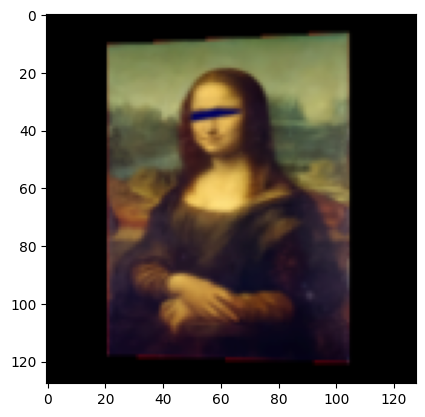

In [23]:
# lets do a test image

path = f"dataset/test_raw/mona_{299}.png"

test_img_raw = cv2.imread(path)
test_img_rgb = cv2.cvtColor(test_img_raw, cv2.COLOR_BGR2RGB)
# plt.imshow(test_img_rgb)
# plt.show()
test_img_c = color_prepare(test_img_rgb, debug=True, test=True)
# print(test_img_c)
# plt.imshow(test_img_c)
# plt.show()
test_img_t = size_prepare(test_img_c, 128)
# plt.imshow(test_img_t)
# plt.show()
cv2.imwrite(f"dataset/test/monatest_0.png", cv2.cvtColor(test_img_t, cv2.COLOR_RGB2BGR)*255)

plt.imshow(test_img_t)
plt.show()